In [3]:
import pandas as pd

In [5]:
df = pd.read_csv('Downloads/Loan_Approval_Data.csv')

In [6]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [7]:
Important_features = pd.DataFrame(data = df, columns = ['Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Loan Status'])

In [8]:
Important_features.shape

(111105, 11)

In [14]:
Important_features['Loan Status'].value_counts()

Fully Paid     85934
Charged Off    25171
Name: Loan Status, dtype: int64

In [9]:
from pycaret.classification import *

In [10]:
clf = setup(data = Important_features, target = 'Loan Status', train_size = 0.80, fix_imbalance = True)

,Description,Value
0,Session id,7199
1,Target,Loan Status
2,Target type,Binary
3,Target mapping,"Charged Off: 0, Fully Paid: 1"
4,Original data shape,"(111105, 11)"
5,Transformed data shape,"(159715, 14)"
6,Transformed train set shape,"(137494, 14)"
7,Transformed test set shape,"(22221, 14)"
8,Ordinal features,1
9,Numeric features,5


In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
len(models())

18

In [13]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8120,0.7942,0.9610,0.8249,0.8877,0.3301,0.3708,24.2040
ridge,Ridge Classifier,0.6836,0.0000,0.7093,0.8570,0.7762,0.2527,0.2662,7.4610
lda,Linear Discriminant Analysis,0.6835,0.7343,0.7091,0.8571,0.7761,0.2527,0.2663,9.3850
knn,K Neighbors Classifier,0.6619,0.6765,0.6964,0.8391,0.7611,0.1995,0.2099,10.8010
qda,Quadratic Discriminant Analysis,0.6068,0.6756,0.6198,0.8724,0.6468,0.1609,0.2264,8.9010
lr,Logistic Regression,0.5632,0.7051,0.5110,0.8718,0.6425,0.1688,0.2131,29.4930
svm,SVM - Linear Kernel,0.5584,0.0000,0.5360,0.8392,0.6480,0.1184,0.1462,7.7700
rf,Random Forest Classifier,0.4224,0.6611,0.2896,0.8885,0.4360,0.0914,0.1595,18.8250
ada,Ada Boost Classifier,0.3637,0.6555,0.1971,0.9085,0.3238,0.0667,0.1451,17.4670
nb,Naive Bayes,0.3413,0.6726,0.1484,0.9996,0.2584,0.0731,0.1946,8.7610


In [15]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7199, verbose=0, warm_start=False)


In [ ]:
#tuned_best = tune_model(best,choose_better=True)

In [20]:
#create_api(best,'loan_approval_app')

In [23]:
#create_app(best)

In [24]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

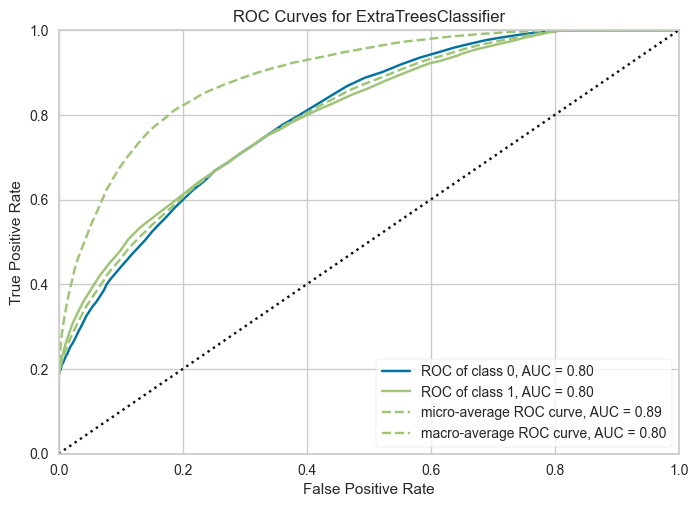

In [25]:
plot_model(best, plot = 'auc')

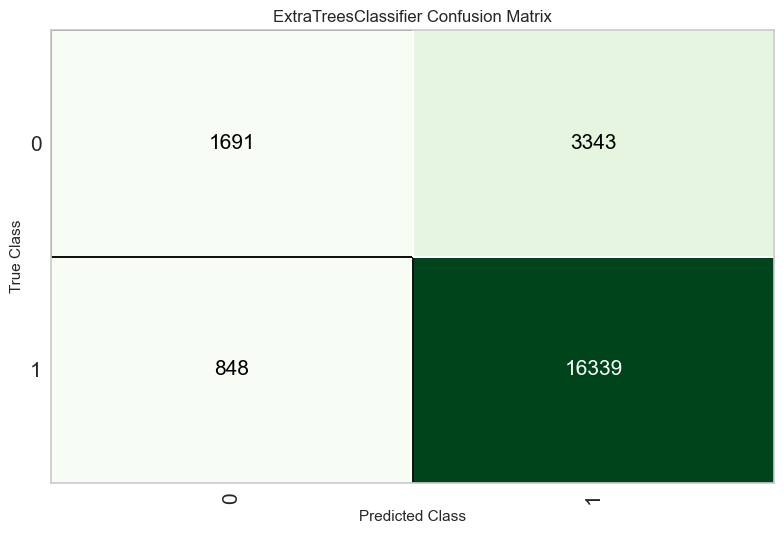

In [26]:
plot_model(best, plot = 'confusion_matrix')

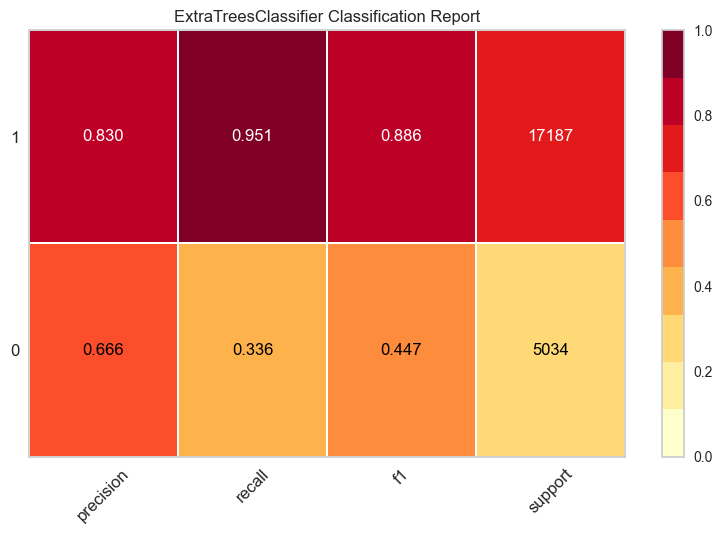

In [27]:
plot_model(best, plot = 'class_report')

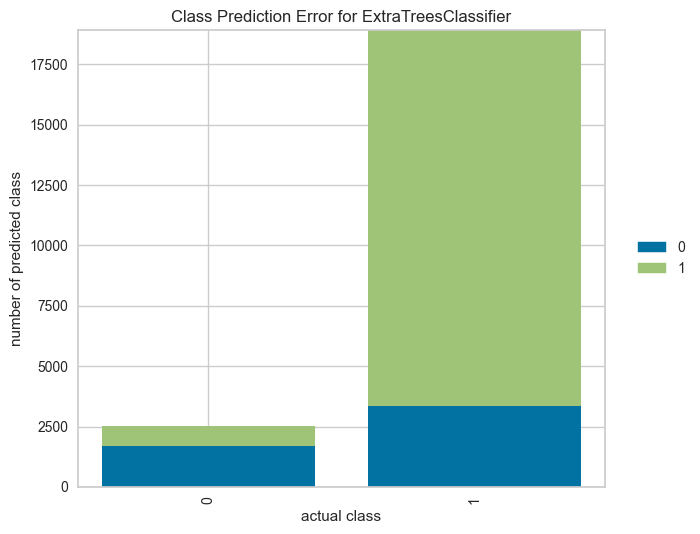

In [29]:
plot_model(best, plot = 'error')

In [30]:
predict_model(best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8114,0.8000,0,0,0,0.3475,0.3771


In [31]:
final_cls = finalize_model(best)

In [32]:
predict_model(final_cls);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6634,0.8015,0,0,0,0.3177,0.3744


In [33]:
save_model(final_cls,'loan_status_exp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\satish\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Current Loan Amount',
                                              'Credit Score', 'Annual Income',
                                              'Years of Credit History',
                                              'Number of Open Accounts'],
                                     transfo...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,

In [34]:
load_exp = load_model('loan_status_exp')

Transformation Pipeline and Model Successfully Loaded


In [36]:
new_data = Important_features.sample(n=50)

In [37]:
predict_new = predict_model(load_exp,data=new_data,raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,0,0,0,1.0000,1.0000


In [38]:
results = pd.DataFrame(predict_new)

In [39]:
print(results)

    Current Loan Amount  Term  Credit Score  Years in current job  \
0               30456.0   0.0    725.000000              0.784567   
1               24683.0   1.0   7410.000000              0.784596   
2                6462.0   1.0    747.000000              0.784567   
3               13637.0   1.0   1075.728701              0.767792   
4               14517.0   0.0    685.000000              0.767837   
5               10081.0   1.0    738.000000              0.784713   
6               10257.0   1.0    737.000000              0.784713   
7               19914.0   1.0   1075.728701              0.784567   
8               35172.0   0.0   7140.000000              0.781607   
9               35175.0   0.0    663.000000              0.767792   
10               6052.0   1.0    746.000000              0.784596   
11              10111.0   1.0    739.000000              0.781508   
12              21053.0   1.0   1075.728701              0.784596   
13               7887.0   1.0   10